<a href="https://colab.research.google.com/github/mrhamza7/AllFunction/blob/master/LinearRegression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step:1  Import Necessary Libraries**

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

**Load Dataset**

In [23]:
data=pd.read_csv('/content/Salary_dataset.csv')

In [24]:
data.head(3)

,YearsExperience,Salary
0,1.2,39344
1,1.4,46206
2,1.6,37732


In [32]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


**Handle missing value if exist**

In [26]:
print(data.isnull().sum())

YearsExperience    0
Salary             0
dtype: int64


**Remove outliers**

In [27]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Apply on numerical columns
for col in data.select_dtypes(include=[np.number]).columns:
    data = remove_outliers_iqr(data, col)

In [28]:
data.tail(3)

,YearsExperience,Salary
27,9.7,112636
28,10.4,122392
29,10.6,121873


**Features Scaling(Normalization)**

In [59]:
scaler = MinMaxScaler()
X=data.iloc[:,:-1]
data['Scaled_YearsExperience'] = scaler.fit_transform(data[['YearsExperience']])

In [60]:
data.head(3)

,YearsExperience,Salary,Scaled_YearsExperience
0,1.2,39344,0.000000
1,1.4,46206,0.021277
2,1.6,37732,0.042553


**Exploratory Data Analysis(EDA)**

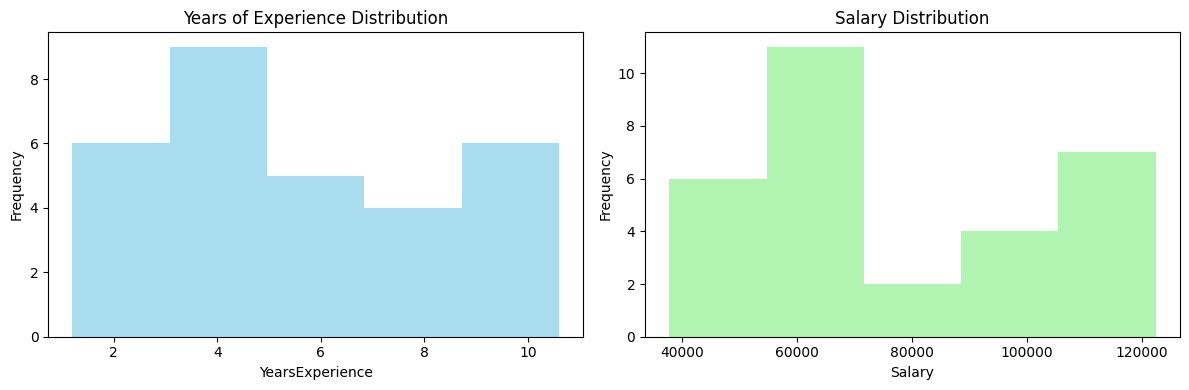

In [68]:
# Plot distributions for the uploaded dataset: 'YearsExperience' and 'Salary'

plt.figure(figsize=(12, 4))

# Distribution of YearsExperience
plt.subplot(1, 2, 1)
plt.hist(data['YearsExperience'], bins=5, color='skyblue', alpha=0.7)
plt.title("Years of Experience Distribution")
plt.xlabel("YearsExperience")
plt.ylabel("Frequency")

# Distribution of Salary
plt.subplot(1, 2, 2)
plt.hist(data['Salary'], bins=5, color='lightgreen', alpha=0.7)
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

**Scatter Plot (Relationship Between Variables)**

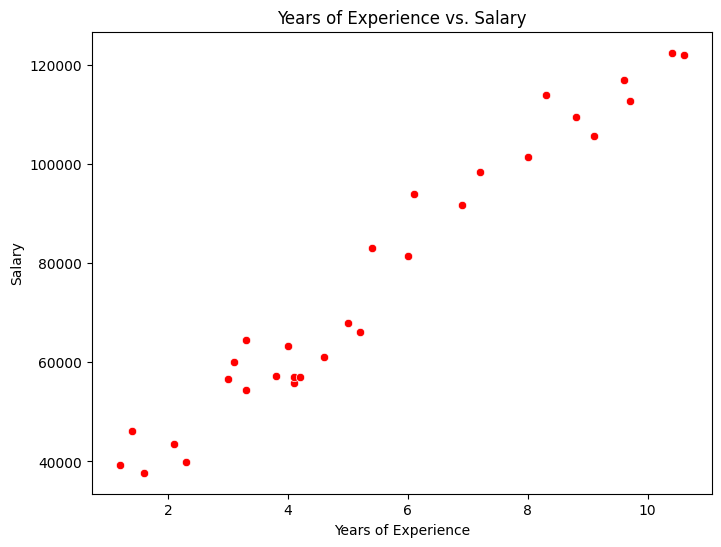

In [69]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='YearsExperience', y='Salary',color='red', data=data)
plt.title('Years of Experience vs. Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


In [70]:
# 1. Create and train the model
model = LinearRegression()  # Create a LinearRegression object
X = data[['Scaled_YearsExperience']]  # Features (independent variable)
Y = data['Salary']  # Target (dependent variable)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # Split data
model.fit(X_train, y_train)  # Train the model on the training data

LinearRegression()

In [64]:
y_pred = model.predict(X_test)

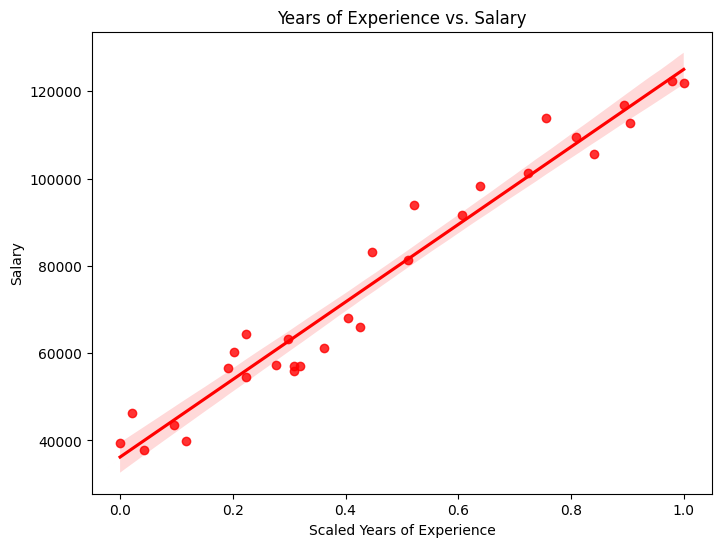

In [73]:
# prompt: plot regression line

import matplotlib.pyplot as plt
# Plot the regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='Scaled_YearsExperience', y='Salary', data=data, color='red')  # Use regplot for regression line
plt.title('Years of Experience vs. Salary')
plt.xlabel('Scaled Years of Experience')
plt.ylabel('Salary')
plt.show()


In [76]:
# Evaluate the model using R-squared
r2 = model.score(X_test, y_test)
print(f"R-squared: {r2}")

R-squared: 0.9024461774180501
